# Common Visualisation Types in EDA 



In [ ]:
#@title ### Run the following cell to download the necessary files for this lesson { display-mode: "form" } 
#@markdown Don't worry about what's in this collapsed cell

print('Downloading GermanCredit.csv...')
!wget https://s3-eu-west-1.amazonaws.com/aicore-portal-public-prod-307050600709/lesson_files/4e75c737-d7a5-4d4c-8d1d-a8a8322dd539/GermanCredit.csv -q -O GermanCredit.csv


> In this lesson we will look at some of the different visualisation techniques you can use during an Exploratory Data Analysis (EDA) project.  We will take a look at the relative merits of the most commonly used plotting packages in Python, as well as the advantages and disadvantages of various univariate and bivariate plots. We will also consider different techniques to plot the entire dataset in a single summary figure.

## Commonly Used Libraries and Packages for Visualisation


### 1. `Matplotlib`

> `Matplotlib` is the oldest and most widely used data visualization library in Python. It offers a high degree of flexibility and customization, allowing you to create almost any type of chart or plot you can think of.

Some of its advantages are:
- **Flexible**: `Matplotlib` allows for a high level of customization, and you can control almost every element of a plot
- **Compatible**: Many other libraries (including `Seaborn` and `Pandas`) are built on top of `Matplotlib`, meaning they inherently work well together.
- **Community and Resources**: Given its age, there's a large community and a wealth of online resources and examples for troubleshooting and inspiration

Some of its disadvantages are:
- **Complex**: While `Matplotlib`'s versatility is a strength, it can also be a disadvantage. Advanced visualisations can involve writing a lot of code, and it can be daunting for beginners.
- **Sub-optimal aesthetics**: The default aesthetics of `Matplotlib` are not as visually appealing as those of some other libraries, and improving the aesthetics often requires a lot of effort
- **Not Interactive**: `Matplotlib` has limited support for interactive visualizations, especially compared to a library like `Plotly`

### 2. `Seaborn`

> `Seaborn` is another Python library, built on top of Matplotlib and integrates well with `Pandas` data structures, simplifying the process of visualizing data directly from DataFrames. It's particularly useful for statistical data visualisation, and its appealing default aesthetics make it a popular choice for producing professional-looking visualisations quickly.

Some of its advantages are:
- **Statistical Graphics**: `Seaborn` shines when it comes to creating statistical graphics and understanding the distribution of your data. It makes it easy to create complex plots like heat maps, violin plots, and pair plots
- **Aesthetics**: `Seaborn `provides attractive default styles and color palettes to make your plots look professional and appealing
- **Simplified Syntax**: `Seaborn` simplifies `Matplotlib`'s sometimes verbose syntax, making code easier to write and understand

Some of its disadvantages are:
- **Inflexible**: `Seaborn` doesn't offer the same level of flexibility and control as `Matplotlib`. While it simplifies the process of creating many types of plots, it can be harder (though not impossible) to customize plots beyond the built-in functionality.
- **Non-Interactive**: Like `Matplotlib`, `Seaborn` also has limited support for interactive visualisations. It's primarily designed for creating static plots.

### 3. Plotly

>`Plotly` is a library that is particularly useful for creating interactive plots. It's also platform-agnostic, with support for Python, R, MATLAB, JavaScript, and more.

Some of its advantages are:
- **Interactive**: The biggest advantage of `Plotly` is the ability to create interactive plots that allow users to zoom, pan, hover over data points, and see updated information
- **3D plots**: `Plotly` provides extensive support for 3D plots, which isn't as well-supported in `Matplotlib` or `Seaborn`
- **Web Integration**: `Plotly` plots can be easily integrated into web applications, particularly those built using Dash, a popular framework for building analytical web applications with Python

Some of its disadvantages are:
- **Learning Curve**: `Plotly`'s syntax can be a bit more difficult to learn initially, especially for those who are used to the Matplotlib/Seaborn way of doing things
- **Performance**: `Plotly`'s interactive plots can be slower to render and more computationally intensive, especially for larger datasets
- **Compatibility**: Because it's not built on `Matplotlib`, `Plotly` doesn't integrate as seamlessly with libraries like `Pandas` and `Seaborn`, which are designed with `Matplotlib` compatibility in mind

## Univariate Plots

*Univariate plots* are a type of data visualization that focus on a single variable. They are used to summarise and understand the distribution of a variable, providing insights into its central tendencies, dispersion and shape. In EDA, univariate plots are useful because they allow us to understand the characteristics of each variable, identify outliers, discover patterns, and detect anomalies in the data. 

Let's load some data, and explore it using various univariate plots: 

In [7]:
import pandas as pd
pd.set_option('display.max_columns', 500)
df = pd.read_csv('GermanCredit.csv', index_col=0)
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, ... < 100 DM to 0 <= ... < 200 DM
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   duration                 1000 non-null   int64 
 1   credit_history           1000 non-null   object
 2   purpose                  1000 non-null   object
 3   amount                   1000 non-null   int64 
 4   savings                  1000 non-null   object
 5   employment_duration      1000 non-null   object
 6   installment_rate         1000 non-null   int64 
 7   personal_status_sex      1000 non-null   object
 8   other_debtors            1000 non-null   object
 9   present_residence        1000 non-null   int64 
 10  property                 1000 non-null   object
 11  age                      1000 non-null   int64 
 12  other_installment_plans  1000 non-null   object
 13  housing                  1000 non-null   object
 14  number_credits       

This is the `German Credit Dataset`, a popular dataset for risk prediction, originally published by Professor Dr. Hans Hofmann of the University of Hamburg. The dataset contains 1,000 entries with 20 features, with both continuous and categorical data.

### Histogram

> A __histogram__ is a plot which displays the distribution of a variable in terms of frequency counts in each of a set of x-axis "bins", which are usually specified as consecutive, non-overlapping intervals of a variable. It can be thought of as a quantised approximation of the probability function of the sample distribution.

Histograms are very easy to create, and can be created directly from a `Pandas` dataframe using the `pd.DataSeries.hist()` method. Let's use it to take a look at the distribution of ages of loan customers in the dataset.

Some advantages are:
- Simple 
- Can represent a large amount of data 
- Can be used for both continuous and discrete data
- Provide a lot of detail about the distribution, including central tendency, dispersion, and skewness

Some disadvantages are:
- Can look very different depending on the number of bins used
- No definitive rule for choosing the perfect bin size
- Count-based, so don't allow you to identify individual data points 
- Imply a continuity of data by connecting the bars together, which might not always be accurate (eg. for discrete data or data with gaps)

<Axes: >

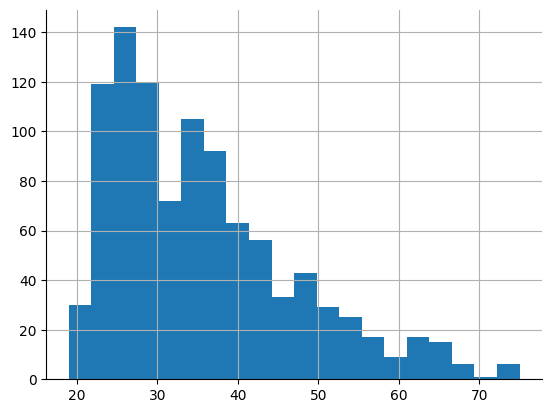

In [122]:
df['age'].hist(bins=20)

## Density Plot / Probability Density Function (PDF) plot / Kernel Density Estimate (KDE) plot

>A *density plot*, also know as a PDF or KDE plot, is basically just a histogram, overlaid with a smoothed and interpolated curve showing the probability density function implied by the bins of the histogram.

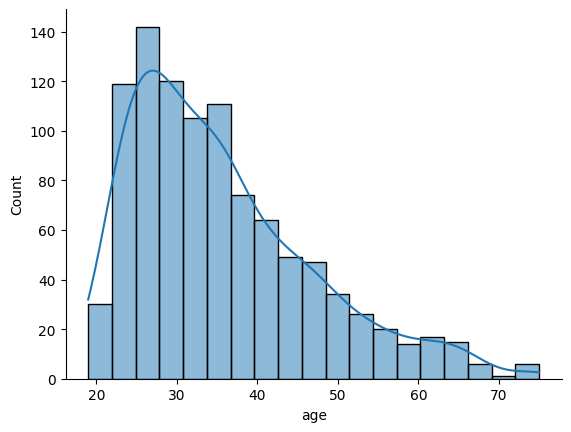

In [83]:
import seaborn as sns
sns.histplot(data=df, x="age", kde=True)
sns.despine()


### Box-and-Whiskers

>A *box and whisker* plot, also known as a box plot, is a graphical representation of statistical data based on a five-number summary: the minimum, first quartile (25th percentile), median (50th percentile), third quartile (75th percentile), and maximum. 

The "box" in the plot represents the interquartile range (the range between the first quartile and the third quartile), with a line inside the box indicating the median. The "whiskers" extend from the box to the minimum and maximum values, providing a visual display of the full range of the data. Outliers may be plotted as individual points beyond the whiskers. This type of plot is useful for visually displaying the spread and skewness of data, and for identifying potential outliers.

Some advantages are:
- Efficiently summarise the distribution of data
- Clearly depict median, quartiles, and potential outliers
- Handle large data sets well
- Compare multiple distributions effectively
- Not affected by extreme values

Some disadvantages are:
- Do not show the shape of the distribution
- Cannot capture detailed nuances in the data
- May hide significant data points or patterns
- Not suitable for displaying the distribution of categorical data
- Can be less intuitive to understand than other plots

In [55]:
import plotly.express as px
# create a boxplot of amount:
fig = px.box(df, y="age",width=600, height=500)

fig.show()

### Violin Plot

> A __violin plot__ is a method of plotting numerical data that combines aspects of a boxplot and a kernel density plot. It's often used to display distributions across different categories. 

The "violins" in the plot represent mirrored density estimates — much like smoothed histograms — and give a clear view of the distribution of the data, showing both the density and range of the data at different values. Inside the "violin", you may also find a boxplot or individual data points, providing additional detail about the quartiles of the data and potential outliers. This type of plot is particularly useful when comparing distributions across different groups or conditions.

Some advantages are:
- Combine the benefits of histograms/kde and boxplots
- Display the full distribution of the data
- Highlight differences in distribution shape and spread

Some disadvantages are:
- Can be more complex and less familiar to interpret
- Less precise for locating quartiles or outliers
- Not as effective for small sample sizes

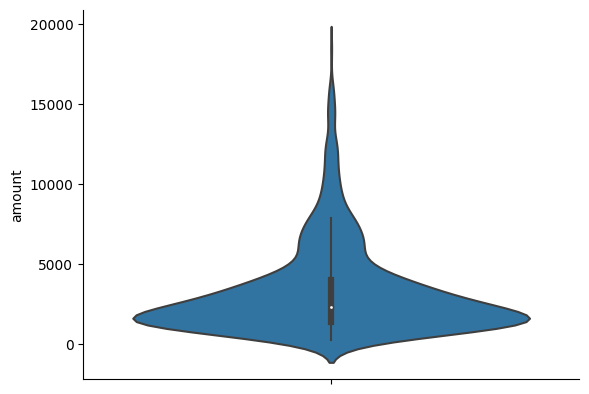

In [84]:
sns.violinplot(data=df, y="amount")
sns.despine()

### Discrete Probability Distribution

> A *discrete probability distribution plot* is a graphical representation of the probabilities of all possible outcomes of a discrete random variable. 

On the x-axis, it represents each distinct value that the random variable can take on. Correspondingly, on the y-axis, it depicts the probability of each of these values occurring. Each value of the variable is associated with a probability, and the total of these probabilities is equal to 1. These plots are particularly useful for understanding the likelihood of different outcomes in a discrete data set, such as the roll of a die, or the number of defective items in a batch.

Some advantages are:
- Visually represent all possible outcomes and their probabilities
- Easy to interpret and understand

Some disadvantages are:
- Less informative for large numbers of possible outcomes
- Can become cluttered if too many outcomes are present

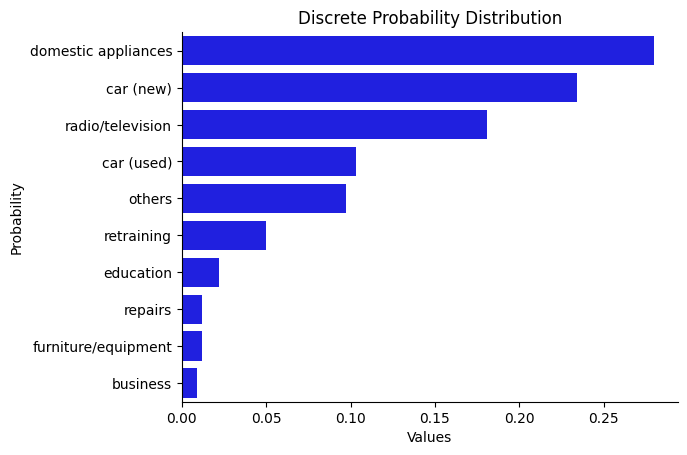

In [89]:
import matplotlib.pyplot as plt
plt.rc("axes.spines", top=False, right=False)

# Calculate value counts and convert to probabilities
probs = df['purpose'].value_counts(normalize=True)

# Create bar plot
dpd=sns.barplot(y=probs.index, x=probs.values, color='b')

plt.xlabel('Values')
plt.ylabel('Probability')
plt.title('Discrete Probability Distribution')
plt.show()

### Pie Chart

> A *pie chart* is a circular statistical graphic divided into slices to illustrate numerical proportions. Each slice of the pie represents a category from the dataset, and the size or angle of the slice corresponds to its proportion of the total. The entire "pie" represents the total data set and each "slice" represents a particular category within that data set. 

Pie charts are widely used in business and media to represent percentage or proportional data. At their best, they quickly show the relative prevalence of a small number of categories. At their worst they can become cluttered and misleading, obscuring the accurate representation of data.

Some advantages are:
- Visually simple and easily understood
- Clearly indicate proportions of a whole
- Effective when comparing a small number of categories
- Non-technical people find them easy to understand

Some advantages are:
- Inefficient for comparing individual sections when there are many categories
- Difficult to compare across multiple pie charts
- Inaccurate perception of proportions or comparisons between sections
- Technical people often generally hate them, to the extent that `Seaborn` doesn't even implement them!

In [56]:
data = df['purpose'].value_counts()

fig = px.pie(values=data.values, names=data.index, title='Pie Chart of Loan Purpose', width=600)
fig.show()





### Cumulative Density Function (CDF)

> A *cumulative density function plot*, also known as a cumulative distribution function (CDF) plot, is a graphical representation of the cumulative probability distribution of a random variable. The x-axis covers the range of values the variable takes, while the y-axis represents the cumulative probability from 0 to 1. The plot displays how the probabilities accumulate as the variable increases, providing insights into the overall distribution of the data, including central tendency, spread, and skew. It is particularly useful for comparing multiple distributions or assessing the goodness-of-fit for a given distribution.


Some advantages are:
- Display the entire data distribution
- Allow for easy comparison of multiple distributions
- Reveal percentile information directly
- Not affected by binning bias as histograms
- Can handle both discrete and continuous data


Some advantages are:
- May be less intuitive to understand than other plots
- Do not show frequency or density information directly
- Less effective for visualizing multimodal distributions
- Difficult to identify specific data points or outliers


Text(0, 0.5, 'Cumulative Probability')

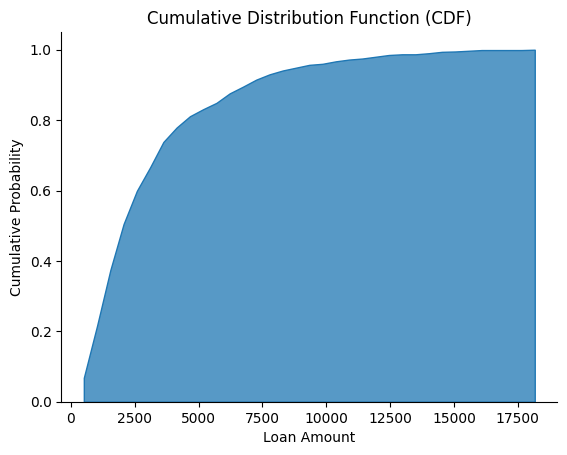

In [90]:
# create a cumulative distribution plot of amount:
# Assuming 'df' is your DataFrame and 'column' is the column you want to visualize
sns.histplot(df['amount'], cumulative=True, stat='density', element="poly")

plt.title('Cumulative Distribution Function (CDF)')
plt.xlabel('Loan Amount')
plt.ylabel('Cumulative Probability')

## Bivariate Plots

> *Bivariate* plots are a type of data visualization that focus on the relationship between two variables. 

They are used to investigate and understand the association or correlation between these variables, providing insights into trends, patterns, and potential outliers. In exploratory data analysis (EDA), bivariate plots are essential because they allow analysts to discern complex interdependencies, identify the nature of relationships (linear, non-linear), spot anomalies, and formulate hypotheses for further investigation.


### Scatter Plots


>*Scatter plots* are a type of bivariate plot used to display the relationship between two (usually continuous) numerical variables. Each point on the plot represents an observation in the dataset and is placed according to the values of the two variables it represents. 

Scatter plots are particularly useful in identifying trends, patterns, and potential correlations between variables, as well as in spotting outliers. They are often used as a basis for curve fitting and regression, as they show each individual data point, and so make it easy to visualise residuals (the difference between the observed and modelled values).

Some advantages are:
- Clear visualization of relationships between two variables
- Can show a broad range of data points simultaneously
- Useful for identifying trends, patterns, and outliers
- Good background plot for visualising regression lines or curve fitting

Some advantages are:
- Not effective for visualizing relationships in large datasets with many overlapping points
- Difficult to interpret when dealing with categorical data
- Do not provide a detailed summary statistic or inference




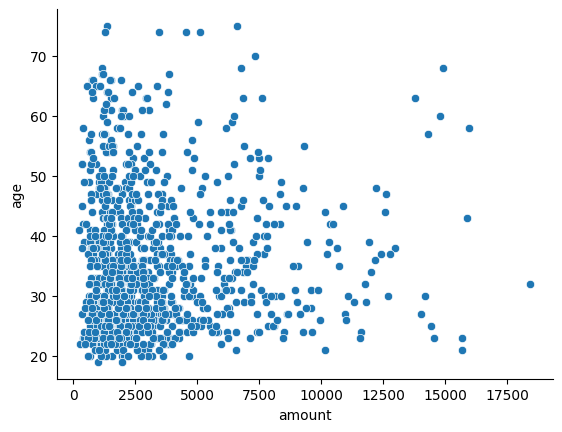

In [87]:
# create a scatter plot of amount vs age:
sns.scatterplot(data=df, x="amount", y="age")


### Bar Chart

>*Bar charts* are a type of data visualization tool that allow some value to be compared across categories. Each bar in the chart represents a category, while the height of the bar corresponds to the value it represents. 

They are widely used in exploratory data analysis to summarize categorical or discrete data and to identify patterns or trends among groups. While the x-axis data must be categorical in nature, the y-axis values can either be continuous (bar height represents mean value for each category) or categorical (using a stacked bar chart to represent proportions of each category).

One downside of a standard bar chart is that it only displays the mean value for each category, and this can lead to false conclusions. They are therefore often augmented in various ways, for example by adding error bars for standard deviation or standard error, or by overlaying the individual data points that comprise the bar.

Some advantages are:
- Easy to understand and interpret
- Effectively represents data across different categories
- Can represent both nominal and ordinal categories

Some advantages are:
- Not suitable for visualizing continuous data
- Inefficient for displaying a large number of categories


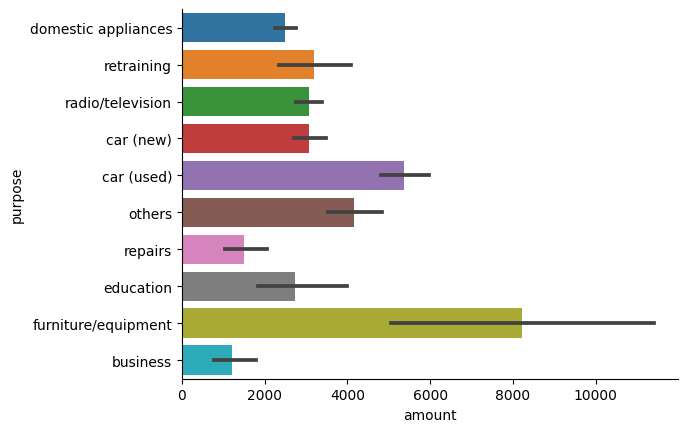

In [88]:
# create a bar plot of purpose vs amount
sns.barplot(data=df, y="purpose", x="amount")


## Plots for Assessing an Entire Dataset Quickly

When undertaking EDA on a new dataset, it can often be helpful to create a summary figure that helps you understand all the interrelated variables at a glance. While these summary approaches can be undertaken at any time, it is usually best to complete the data cleaning and preprocessing stage first, as `null` values or heavily skewed data can render the results difficult to interpret. Additionally, these approaches tend to work best on datasets with a high proportion of continuous or discrete numeric variables. It is less easy to perform this kind of summary analysis with categorical data.

### Pair Plots

>*Pair plots* are a type of visualisation tool that showcases relationships between multiple pairwise combinations of variables in a dataset. For a set of `n` variables, it generates a grid of `n x n` plots, with the diagonal usually depicting the univariate distribution of the data for the variable in that column, and the off-diagonal plots showing the scatter plots of variable pair combinations. 

Pair plots are extremely useful in exploratory data analysis, particularly when most of the data are continuous in nature. They are less easy to interpret for pairs of categorical variables.

Some advantages are:
- Provide a comprehensive overview of relationships among multiple variables
- Can quickly identify trends, patterns, and correlations across an entire dataset
- Useful for spotting variable pairs with strong relationships
- Facilitate identification of potential outliers

Some disadvantages are:
- Can be overwhelming and hard to interpret with too many variables
- Not suitable for categorical variables
- May be very computationally expensive for large datasets
- Lack of detail in individual plots due to their small size

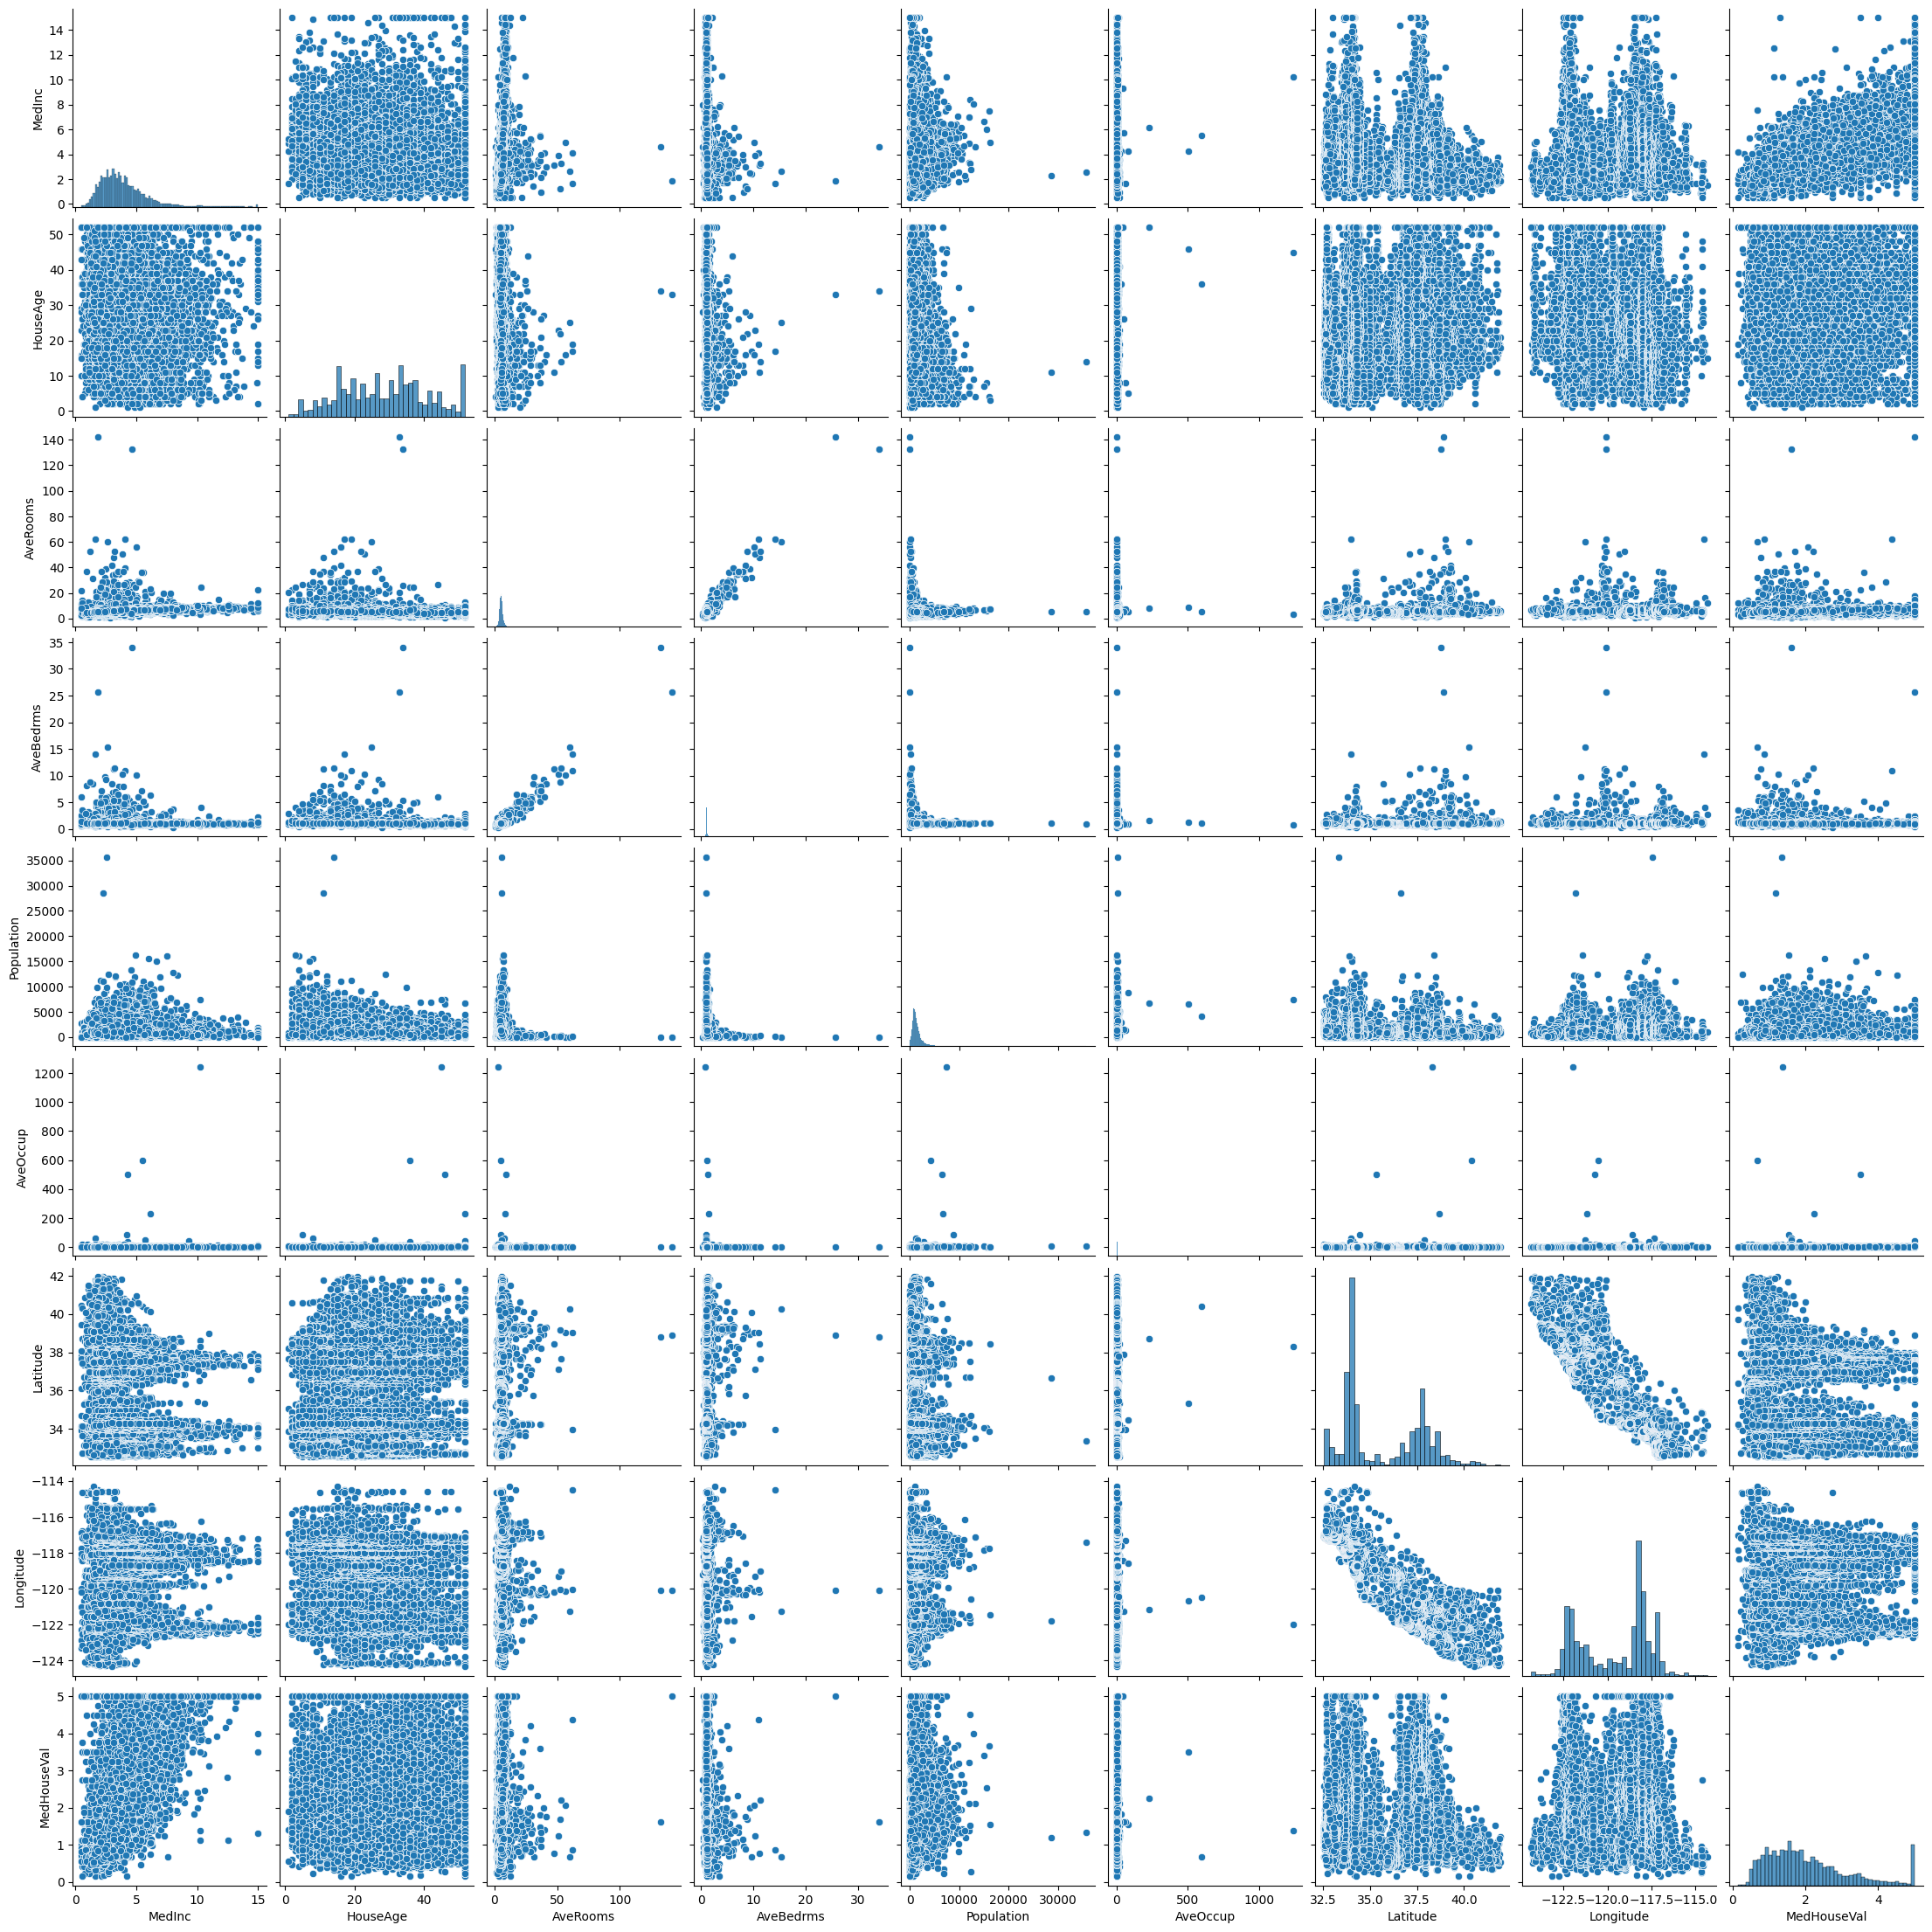

In [100]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

california_housing = fetch_california_housing(as_frame=True).frame

# create pairplot of california housing data:
sns.pairplot(california_housing)


### Correlation Matrix

>*Correlation matrices* are a type of heatmap visualization that display the correlation coefficients between pairs of variables in a dataset. Each cell in the grid represents the correlation between a pair of variables, and the color of the cell reflects the strength and direction of this correlation, usually following a gradient color scale. 

In exploratory data analysis (EDA), correlation heatmaps are incredibly useful for quickly identifying relationships and associations between variables. They help in understanding which variables are strongly correlated with each other, which can be invaluable for feature selection, understanding collinearity, and directing further analyses.

Some advantages are:
- Provides a quick and comprehensive overview of correlations between variables
- Useful for identifying highly correlated variables for feature selection
- Help to detect collinearity issues which could affect certain modeling techniques
- Color coding makes interpretation intuitive and immediate

Some disadvantages are:
- Only capture linear relationships between variables
- Not suitable for categorical variables unless they are suitably encoded
- Can be overwhelming and difficult to interpret with too many variables

<Axes: >

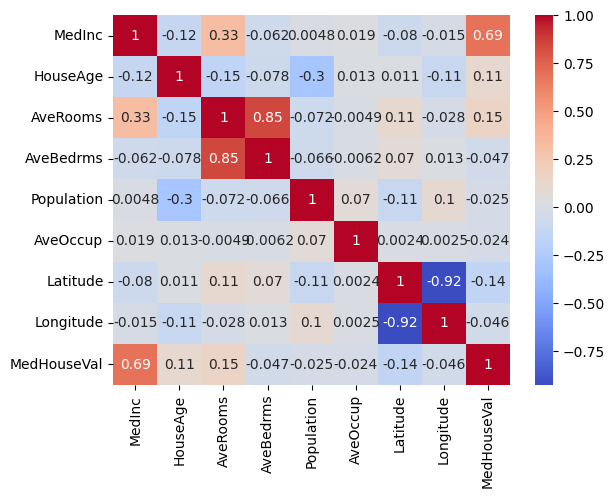

In [101]:
# create correlation matrix for california housing data:
sns.heatmap(california_housing.corr(), annot=True, cmap='coolwarm')

## Key Takeaways

- The three most commonly used Python packages for plotting are `Matplotlib`, `Seaborn` and `Plotly`
- Each package has its own advantages and disadvantages, but all three are very flexible and can perform most tasks
- __Univariate__ plots are useful for understanding the distribution of a single variable, and can help detect outliers and skew
- Types of univariate plot for __continuous__ data include __histograms__, __box-and-whiskers__, and __violin plots__
- Useful univariate plots for __categorical__ data include __discrete probability distributions__ and __cumulative density functions__
- __Bivariate__ plots allow us to compare two variables. Useful types include __scatter plots__ and __bar charts__
- __Summary figures__ assess all the variables in a dataset simultaneously, and can be useful for getting a high-level view
- Types of summary figure include __pair plots__ and __correlation matrices__